# Cars Price Prediction Project

## Problem Statement

With the covid19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('cars.csv')

In [3]:
df

,Unnamed: 0,Brand,Model,year,Owners,Transmission,Variant,Mileage,Fuel,Price
0,0,Mercedes-Benz,GL-Class,2015,1st,Automatic,350 CDI Blue Efficiency,65000.0 km,Diesel,"₹ 35,50,111"
1,1,Mercedes-Benz,New C-Class,2012,2nd,Automatic,220 BlueEfficiency,56100.0 km,Diesel,"₹ 11,80,000"
2,2,Fiat,Punto,2012,NaN,Manual,Active 1.3,69856.0 km,Diesel,"₹ 1,55,000"
3,3,Hyundai,Accent,2001,3rd,Manual,GLE,"70,000 km",Petrol,"₹ 70,000"
4,4,Maruti Suzuki,Estilo,2010,2nd,Manual,LXI,"90,000 km",Petrol,"₹ 1,55,000"
...,...,...,...,...,...,...,...,...,...,...
535,535,Mahindra,Scorpio,2018,1st,Manual,S3,39000.0 km,Diesel,"₹ 10,25,000"
536,536,Skoda,Superb,2012,1st,Automatic,2008-2013 2.8 V6 AT,83000.0 km,Diesel,"₹ 4,99,000"
537,537,Maruti Suzuki,Swift Dzire,2017,1st,Automatic,VXi AT,43000.0 km,Petrol,"₹ 5,98,000"
538,538,Maruti Suzuki,A-Star,2010,1st,Automatic,"Vxi (ABS), Automatic",38000.0 km,Petrol,"₹ 2,65,000"


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.shape

(540, 9)

In [6]:
df.isnull().sum()

Brand            0
Model            0
year             0
Owners          21
Transmission     0
Variant         21
Mileage          0
Fuel             0
Price            0
dtype: int64

<AxesSubplot:>

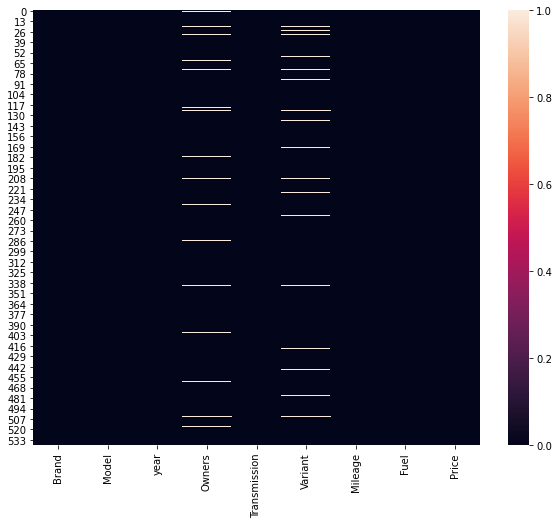

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [8]:
df=df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 539
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         507 non-null    object
 1   Model         507 non-null    object
 2   year          507 non-null    object
 3   Owners        507 non-null    object
 4   Transmission  507 non-null    object
 5   Variant       507 non-null    object
 6   Mileage       507 non-null    object
 7   Fuel          507 non-null    object
 8   Price         507 non-null    object
dtypes: object(9)
memory usage: 39.6+ KB


In [10]:
df.describe()

,Brand,Model,year,Owners,Transmission,Variant,Mileage,Fuel,Price
count,507,507,507,507,507,507,507,507,507
unique,29,139,21,4,3,342,214,5,260
top,Maruti Suzuki,Swift,2018,1st,Manual,Others,65000.0 km,Diesel,"₹ 4,25,000"
freq,157,37,54,339,386,16,13,263,15


In [11]:
for col in df.dtypes[df.dtypes == object].index:
    print('Unique items in column',col,'are:',df[col].unique())
    print('-'*75)

Unique items in column Brand are: ['Mercedes-Benz' 'Hyundai' 'Maruti Suzuki' 'Ford' 'Honda' 'Mahindra'
 'Renault' 'Toyota' 'Skoda' 'BMW' 'Volkswagen' 'Tata' 'Nissan' 'Bentley'
 'Jeep' 'Aston Martin' 'Audi' 'Land Rover' 'Datsun' 'Lamborghini' 'MG'
 'Porsche' 'Chevrolet' 'Other Brands' 'Kia' 'Isuzu' 'Mitsubishi' 'Ferrari'
 'Rolls-Royce']
---------------------------------------------------------------------------
Unique items in column Model are: ['GL-Class' 'New C-Class' 'Accent' 'Estilo' 'Ecosport' 'Brio' 'City'
 'Venue' 'Alto 800' 'Santro Xing' 'Swift' 'Baleno' 'Figo' '800'
 'Swift Dzire' 'Fiesta' 'Creta' 'Xylo' 'Wagon R' 'Wagon R 1.0' 'Logan'
 'KWID' 'XUV500' 'Innova Crysta' 'Rapid' 'Octavia' 'E-Class' 'Zen Estilo'
 'Endeavour' 'XUV300' '5 Series' 'Amaze' 'CLA' 'Grand Vitara' 'X1' 'Ameo'
 'Innova' 'i20' 'Sumo Gold' 'i10' 'Ertiga' 'Jazz' 'Duster' 'A-Star'
 'Xcent' 'WR-V' '3 Series' 'Santro' 'Fluidic Verna' 'Grand I 10' 'Scorpio'
 'Civic' 'Fortuner' 'Terrano' 'Grand i10' 'Rexton' 'Land 

In [12]:
df['Owners'].unique()

array(['1st', '2nd', '3rd', '4th'], dtype=object)

1st    339
2nd    145
3rd     21
4th      2
Name: Owners, dtype: int64

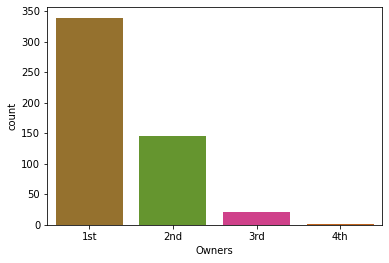

In [13]:
sns.countplot(df['Owners'],palette='Dark2_r')
df['Owners'].value_counts()

In [14]:
df['Owners']=df['Owners'].map({'1st':1,'2nd':2,'3rd':3,'4th':4})

In [15]:
df['Transmission'].unique()

array(['Automatic', 'Manual', ' '], dtype=object)

In [16]:
df['Transmission'].value_counts()

Manual       386
Automatic    114
               7
Name: Transmission, dtype: int64

<AxesSubplot:xlabel='Transmission', ylabel='count'>

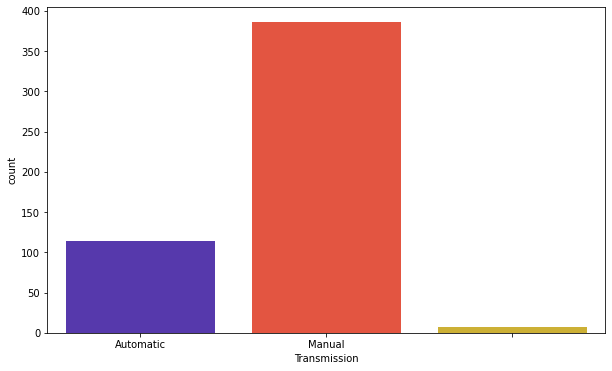

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(df['Transmission'],palette='CMRmap')

In [18]:
df['Transmission']=df['Transmission'].apply(lambda x: 0 if x=='Automatic' else 1)

<AxesSubplot:xlabel='year', ylabel='count'>

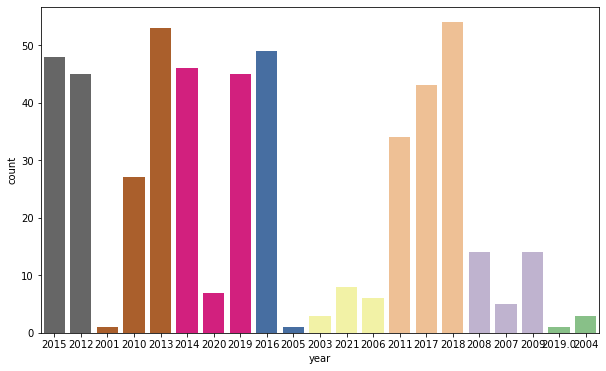

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(df['year'],palette='Accent_r')

In [20]:
df['current_year']=2021

In [21]:
df.year=pd.to_numeric(df['year'])

In [22]:
df['no.of_years']=df['current_year']-df['year']

<AxesSubplot:xlabel='no.of_years', ylabel='count'>

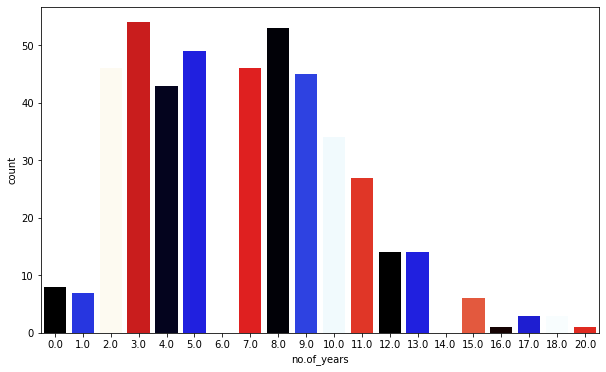

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(df['no.of_years'],palette='flag')

In [24]:
df['Mileage']=df['Mileage'].str.replace(' km','')
df['Mileage']=df['Mileage'].str.replace(',','')

In [25]:
df['Mileage']=pd.to_numeric(df['Mileage'])

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

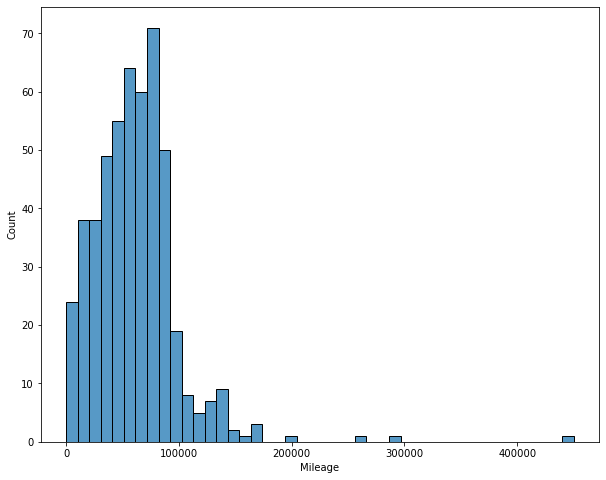

In [26]:
plt.figure(figsize=(10,8))
sns.histplot(df['Mileage'])

In [27]:
df['Price']=df['Price'].str.replace('₹ ','')
df['Price']=df['Price'].str.replace(',','')
#converting into numeric values
df['Price']=pd.to_numeric(df['Price'])

In [28]:
df['Price']=round(df['Price']/10000,2)

<AxesSubplot:xlabel='Price', ylabel='Density'>

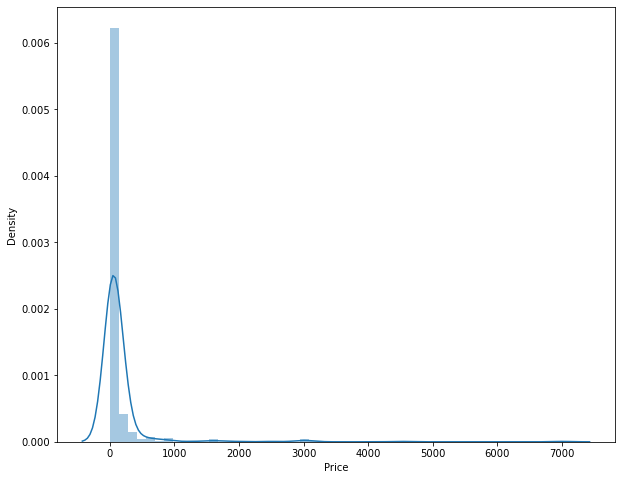

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(df['Price'])

In [30]:
df['Fuel'].value_counts()

Diesel           263
Petrol           228
CNG & Hybrids     12
Electric           2
                   2
Name: Fuel, dtype: int64

In [31]:
df['Fuel']=df['Fuel'].map({'Diesel':0,'Petrol':1,'CNG & Hybrids':2,'Electric':3,' ':0})

<AxesSubplot:xlabel='Fuel', ylabel='count'>

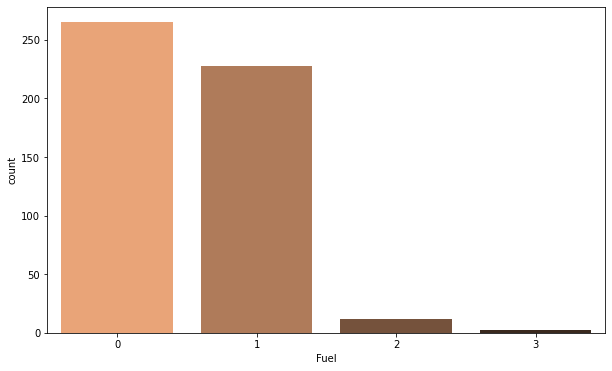

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(df['Fuel'],palette='copper_r')

In [33]:
df.drop(['year','current_year'],axis = 1,inplace = True)

In [34]:
df.head()

,Brand,Model,Owners,Transmission,Variant,Mileage,Fuel,Price,no.of_years
0,Mercedes-Benz,GL-Class,1,0,350 CDI Blue Efficiency,65000.0,0,355.01,6.0
1,Mercedes-Benz,New C-Class,2,0,220 BlueEfficiency,56100.0,0,118.00,9.0
3,Hyundai,Accent,3,1,GLE,70000.0,1,7.00,20.0
4,Maruti Suzuki,Estilo,2,1,LXI,90000.0,1,15.50,11.0
5,Ford,Ecosport,1,1,2013-2015 1.5 DV5 MT Ambiente,80000.0,0,37.00,8.0


In [35]:
df.describe()

,Owners,Transmission,Mileage,Fuel,Price,no.of_years
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,1.380671,0.775148,61198.414201,0.508876,148.413097,6.715976
std,0.585616,0.417897,38742.821570,0.567064,495.214617,3.615705
min,1.000000,0.000000,0.000000,0.000000,1.500000,0.000000
25%,1.000000,1.000000,37333.000000,0.000000,34.400000,4.000000
50%,1.000000,1.000000,60000.000000,0.000000,52.500000,6.000000
75%,2.000000,1.000000,78490.500000,1.000000,89.950000,9.000000
max,4.000000,1.000000,450000.000000,3.000000,7000.000000,20.000000


In [36]:
df_corr = df.corr()
index = df_corr.index
df_corr

,Owners,Transmission,Mileage,Fuel,Price,no.of_years
Owners,1.000000,-0.053327,0.184891,0.010635,-0.014944,0.440369
Transmission,-0.053327,1.000000,0.128920,0.041797,-0.360546,0.092368
Mileage,0.184891,0.128920,1.000000,-0.302905,-0.199082,0.420681
Fuel,0.010635,0.041797,-0.302905,1.000000,0.058316,0.033040
Price,-0.014944,-0.360546,-0.199082,0.058316,1.000000,-0.136546
no.of_years,0.440369,0.092368,0.420681,0.033040,-0.136546,1.000000


<AxesSubplot:>

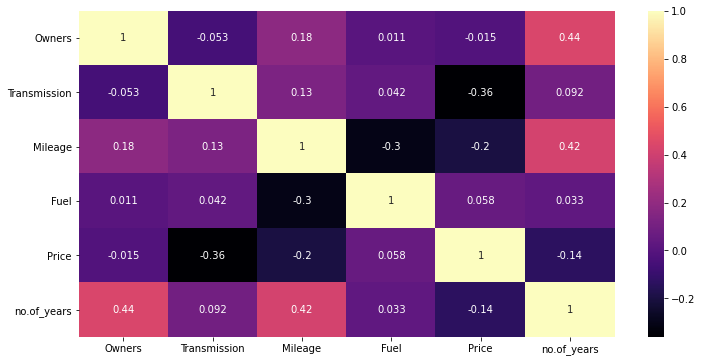

In [37]:
plt.figure(figsize = (12,6))
sns.heatmap(df[index].corr(),annot = True,cmap = 'magma')

In [38]:
df.skew()

Owners          1.391588
Transmission   -1.322036
Mileage         2.938060
Fuel            0.683243
Price           8.661336
no.of_years     0.550882
dtype: float64

In [39]:
df.head()

,Brand,Model,Owners,Transmission,Variant,Mileage,Fuel,Price,no.of_years
0,Mercedes-Benz,GL-Class,1,0,350 CDI Blue Efficiency,65000.0,0,355.01,6.0
1,Mercedes-Benz,New C-Class,2,0,220 BlueEfficiency,56100.0,0,118.00,9.0
3,Hyundai,Accent,3,1,GLE,70000.0,1,7.00,20.0
4,Maruti Suzuki,Estilo,2,1,LXI,90000.0,1,15.50,11.0
5,Ford,Ecosport,1,1,2013-2015 1.5 DV5 MT Ambiente,80000.0,0,37.00,8.0


In [40]:
df.drop(['Brand','Model','Variant'],axis = 1,inplace = True)

In [41]:
df=pd.get_dummies(df, columns=['Owners','Fuel'], drop_first=True)
df

,Transmission,Mileage,Price,no.of_years,Owners_2,Owners_3,Owners_4,Fuel_1,Fuel_2,Fuel_3
0,0,65000.0,355.01,6.0,0,0,0,0,0,0
1,0,56100.0,118.00,9.0,1,0,0,0,0,0
3,1,70000.0,7.00,20.0,0,1,0,1,0,0
4,1,90000.0,15.50,11.0,1,0,0,1,0,0
5,1,80000.0,37.00,8.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
535,1,39000.0,102.50,3.0,0,0,0,0,0,0
536,0,83000.0,49.90,9.0,0,0,0,0,0,0
537,0,43000.0,59.80,4.0,0,0,0,1,0,0
538,0,38000.0,26.50,11.0,0,0,0,1,0,0


In [42]:
x = df.drop(['Price'],axis = 1)
y = df['Price']

In [43]:
x

,Transmission,Mileage,no.of_years,Owners_2,Owners_3,Owners_4,Fuel_1,Fuel_2,Fuel_3
0,0,65000.0,6.0,0,0,0,0,0,0
1,0,56100.0,9.0,1,0,0,0,0,0
3,1,70000.0,20.0,0,1,0,1,0,0
4,1,90000.0,11.0,1,0,0,1,0,0
5,1,80000.0,8.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
535,1,39000.0,3.0,0,0,0,0,0,0
536,0,83000.0,9.0,0,0,0,0,0,0
537,0,43000.0,4.0,0,0,0,1,0,0
538,0,38000.0,11.0,0,0,0,1,0,0


In [44]:
y

0      355.01
1      118.00
3        7.00
4       15.50
5       37.00
        ...  
535    102.50
536     49.90
537     59.80
538     26.50
539     11.00
Name: Price, Length: 507, dtype: float64

### Finding best random state

In [45]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2_score is",maxAccu,"on random_state", maxRS)

Best r2_score is 0.27820776690010773 on random_state 50


### train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [47]:
x_train.shape

(380, 9)

In [48]:
x_test.shape

(127, 9)

In [49]:
y_train.shape

(380,)

In [50]:
y_test.shape

(127,)

### Machine Learning Algorithms

In [51]:
models=[LinearRegression(),Lasso(),Ridge(),
        DecisionTreeRegressor(),GradientBoostingRegressor(),
        RandomForestRegressor(),KNeighborsRegressor()]

In [52]:
for m in models:
    print('model:',m)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("r2_score:",r2_score(y_test,pred))
    print('mean_absolute_error:',mean_absolute_error(y_test,pred))
    print('mean_squared_error:',mean_squared_error(y_test,pred))
    print('-'*50)

model: LinearRegression()
r2_score: 0.27820776690010773
mean_absolute_error: 154.04586015516213
mean_squared_error: 140413.54533753125
--------------------------------------------------
model: Lasso()
r2_score: 0.2761308571465445
mean_absolute_error: 152.3606228835712
mean_squared_error: 140817.57609384938
--------------------------------------------------
model: Ridge()
r2_score: 0.27676628340250664
mean_absolute_error: 153.57387235445012
mean_squared_error: 140693.9637171728
--------------------------------------------------
model: DecisionTreeRegressor()
r2_score: 0.18574483073307135
mean_absolute_error: 122.10818897637795
mean_squared_error: 158400.78333228346
--------------------------------------------------
model: GradientBoostingRegressor()
r2_score: -0.18187337402123016
mean_absolute_error: 129.26467560956178
mean_squared_error: 229915.2345733045
--------------------------------------------------
model: RandomForestRegressor()
r2_score: 0.3519859163970861
mean_absolute_error: 

### Hyper parameter tuning

In [57]:
parameters = {"criterion":["mse","mae"],"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18,25],
             "max_features":['auto','sqrt',"log2"],"min_samples_leaf":[1,3,5,6,7]}

gcv_dt = GridSearchCV(DecisionTreeRegressor(),param_grid=parameters,n_jobs=-1,cv=10,verbose=2)

gcv_dt.fit(x_train,y_train)

Fitting 10 folds for each of 1680 candidates, totalling 16800 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 6, 7],
                         'min_samples_split': [2, 5, 8, 10, 12, 18, 25]},
             verbose=2)

<AxesSubplot:xlabel='Price', ylabel='Count'>

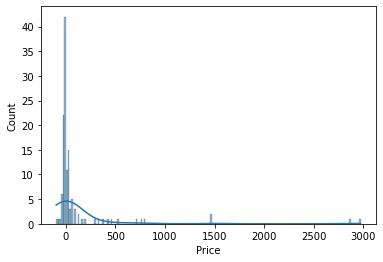

In [61]:
y_pred=gcv_dt.predict(x_test)
sns.histplot(y_test - y_pred, kde = True)

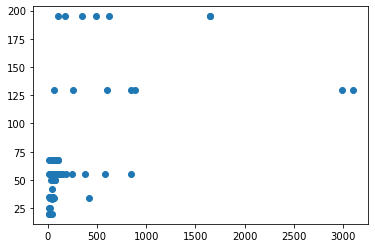

In [62]:
plt.scatter(y_test, y_pred)

In [63]:
print("r2_score:",r2_score(y_test,pred))
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('mean_squared_error:',mean_squared_error(y_test,pred))

r2_score: 0.2584760808732742
mean_absolute_error: 119.41346456692914
mean_squared_error: 144252.04049370077


### Model Saving

In [65]:
import joblib
joblib.dump(gcv_dt,"car_price_prediction.pkl")

['car_price_prediction.pkl']